# Etapa 01

## Importação das bibliotecas essenciais para análise de dados

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Configurações para melhorar a visualização


**Configurações extras:**
- `plt.style.use('default')`: Define um estilo limpo para nossos gráficos
- `sns.set_palette("husl")`: Escolhe uma paleta de cores harmoniosa
- `plt.rcParams`: Configura tamanho padrão dos gráficos e fonte
- `pd.set_option`: Garante que veremos todas as colunas dos nossos DataFrames



In [3]:
plt.style.use("default")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

# Configuração para exibir todas as colunas do DataFrame

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Carregamento da base de dados

In [4]:
path = "C:/Users/bianc/OneDrive/Documents/2-Projetos/05_Statistical_Analysis_of_Salaries_in_Data/Statistical_Analysis_of_Salaries_in_Data/Data"

In [6]:
print(f"{path}/salario_profissionais_dados.csv")

C:/Users/bianc/OneDrive/Documents/2-Projetos/05_Statistical_Analysis_of_Salaries_in_Data/Statistical_Analysis_of_Salaries_in_Data/Data/salario_profissionais_dados.csv


In [7]:
df = pd.read_csv(path + "/salario_profissionais_dados.csv")

## Primeira exploração:


**`pd.read_csv()`:** Esta função é nossa "porta de entrada" para dados em formato CSV. O Pandas automaticamente detecta separadores, tipos de dados e estrutura do arquivo.

**`df.shape`:** Nos dá as dimensões da base (linhas x colunas). É fundamental saber o volume de dados que estamos analisando - isso impacta performance e estratégias de análise.

**`df.head()`:** Mostra as primeiras 5 linhas, como uma "amostra grátis" dos dados. Nos ajuda a visualizar a estrutura real e identificar padrões iniciais.

**`df.info()`:** É como um "raio-X" da nossa base. Mostra:
- Nome de cada coluna
- Quantidade de valores não-nulos
- Tipo de dados (int64, object, float64, etc.)
- Uso de memória

In [8]:
print("📊 INFORMAÇÕES GERAIS DA BASE")
print("=" * 50)
print(f"📏 Dimensões da base: {df.shape[0]} linhas e {df.shape[1]} colunas")
print(f"💾 Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

📊 INFORMAÇÕES GERAIS DA BASE
📏 Dimensões da base: 3755 linhas e 10 colunas
💾 Tamanho em memória: 1744.80 KB


In [11]:
display(df.head())

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


## Verificação de valores nulos

**`df.isnull().sum()`:** Conta quantos valores nulos (NaN, None, vazios) existem em cada coluna. Valores nulos podem indicar problemas na coleta de dados ou campos opcionais.

**Percentual de nulos:** Calculamos `(nulos / total) * 100` para entender a proporção. Se uma coluna tem 50% de valores nulos, talvez não seja confiável para análise.

**`df.dropna().shape[0]`:** Conta quantos registros estão "completos" (sem nenhum valor nulo). Isso nos ajuda a decidir se precisamos fazer limpeza de dados.

**`nunique()`:** Conta valores únicos em colunas categóricas. Por exemplo, se `job_title` tem 50 categorias únicas, sabemos que temos 50 cargos diferentes para analisar.

In [21]:
print("🔍 AUDITORIA DE QUALIDADE DOS DADOS")
print("=" * 50)
print("📊 Valores nulos por coluna:")
valores_nulos = df.isnull().sum()
percentual_nulos = (valores_nulos / len(df)) * 100

# Criando um resumo organizado
resumo_nulos = pd.DataFrame({
    "Valores Nulos": valores_nulos,
    "Percentual": percentual_nulos.round(2)
}) 

print(resumo_nulos)

print(f"\n✅ Total de registros: {len(df)}")
print(f"📈 Registros completos: {df.dropna().shape[0]}")
print(f"⚠️  Registros com dados faltantes: {df.shape[0] - df.dropna().shape[0]}")

🔍 AUDITORIA DE QUALIDADE DOS DADOS
📊 Valores nulos por coluna:
                     Valores Nulos  Percentual
work_year                        0         0.0
country                          0         0.0
region                           0         0.0
experience_level                 0         0.0
job_title                        0         0.0
salary_in_usd                    0         0.0
employee_residence               0         0.0
company_location                 0         0.0
company_size                     0         0.0
years_of_experience              0         0.0

✅ Total de registros: 3755
📈 Registros completos: 3755
⚠️  Registros com dados faltantes: 0


## Verificação dos tipos de dados únicos por coluna categórica

In [22]:
print("\n🏷️  CATEGORIAS ÚNICAS NAS PRINCIPAIS COLUNAS:")
print("=" * 50)
colunas_categoricas = ['experience_level', 'job_title', 'company_size', 'country']
for coluna in colunas_categoricas:
    if coluna in df.columns:
        print(f"{coluna}: {df[coluna].nunique()} categorias únicas")


🏷️  CATEGORIAS ÚNICAS NAS PRINCIPAIS COLUNAS:
experience_level: 4 categorias únicas
job_title: 93 categorias únicas
company_size: 3 categorias únicas
country: 78 categorias únicas


## Análise estatística

**`.describe()`:** É como um "resumo executivo" da nossa variável. Nos dá count (quantidade), mean (média), std (desvio padrão), min/max (extremos) e quartis (25%, 50%, 75%).

**Amplitude:** A diferença entre maior e menor salário nos mostra a "extensão" do mercado salarial.

**Coeficiente de Variação:** É o desvio padrão dividido pela média, multiplicado por 100. Nos diz o quão "espalhados" estão os salários. Acima de 30% indica alta variabilidade.

**Quartis:** Dividem nossos dados em 4 partes iguais:
- Q1 (25%): 25% dos profissionais ganham menos que este valor
- Q2 (50% = mediana): metade ganha menos, metade ganha mais
- Q3 (75%): apenas 25% ganham mais que este valor

**IQR (Amplitude Interquartil):** A diferença entre Q3 e Q1. Representa onde estão concentrados 50% dos salários "centrais", excluindo os extremos.


In [24]:
# Análise estatística descritiva da variável salary_in_usd
print("💰 ANÁLISE ESTATÍSTICA DOS SALÁRIOS")
print("=" * 50)

# Estatísticas descritivas completas
estatisticas = df["salary_in_usd"].describe()
print("📊 Estatísticas Descritivas:")
print(estatisticas)

💰 ANÁLISE ESTATÍSTICA DOS SALÁRIOS
📊 Estatísticas Descritivas:
count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64


In [30]:
# Cálculos adicionais importantes
print(f"\n🎯 MÉTRICAS COMPLEMENTARES:")
print("=" * 30)
print(f"📈 Amplitude (Max - Min): ${df['salary_in_usd'].max() - df['salary_in_usd'].min():,.0f}")
print(f"🎢 Coeficiente de Variação: {(df['salary_in_usd'].std() / df['salary_in_usd'].mean()) * 100:.1f}%")



🎯 MÉTRICAS COMPLEMENTARES:
📈 Amplitude (Max - Min): $444,868
🎢 Coeficiente de Variação: 45.8%


In [33]:
# Identificação de quartis para entender a distribuição
q1 = df['salary_in_usd'].quantile(0.25)
q3 = df['salary_in_usd'].quantile(0.75)
iqr = q3 - q1

print(f"📊 1º Quartil (25%): ${q1:,.0f}")
print(f"📊 3º Quartil (75%): ${q3:,.0f}")
print(f"📏 Amplitude Interquartil (IQR): ${iqr:,.0f}")

📊 1º Quartil (25%): $95,000
📊 3º Quartil (75%): $175,000
📏 Amplitude Interquartil (IQR): $80,000


## Visulização gráfica

**Histograma:** Mostra a "forma" da distribuição. Se vemos uma curva normal, os salários estão bem distribuídos. Se há "picos", indica concentrações em faixas específicas.

**Boxplot:** É como um "resumo visual" dos quartis. A caixa mostra onde estão 50% dos dados centrais, e os "bigodes" mostram a extensão. Pontos fora dos bigodes são outliers.

**Boxplot por categoria:** Compara distribuições entre grupos. Podemos ver rapidamente se seniores ganham mais que juniores, ou se empresas grandes pagam melhor.

**Detecção de outliers:** Usamos a regra estatística padrão: valores além de 1.5 * IQR dos quartis são considerados outliers. Eles podem representar:
- Cargos muito especializados (salários altos)
- Erros de digitação (salários irreais)
- Mercados específicos (países com economia diferente)

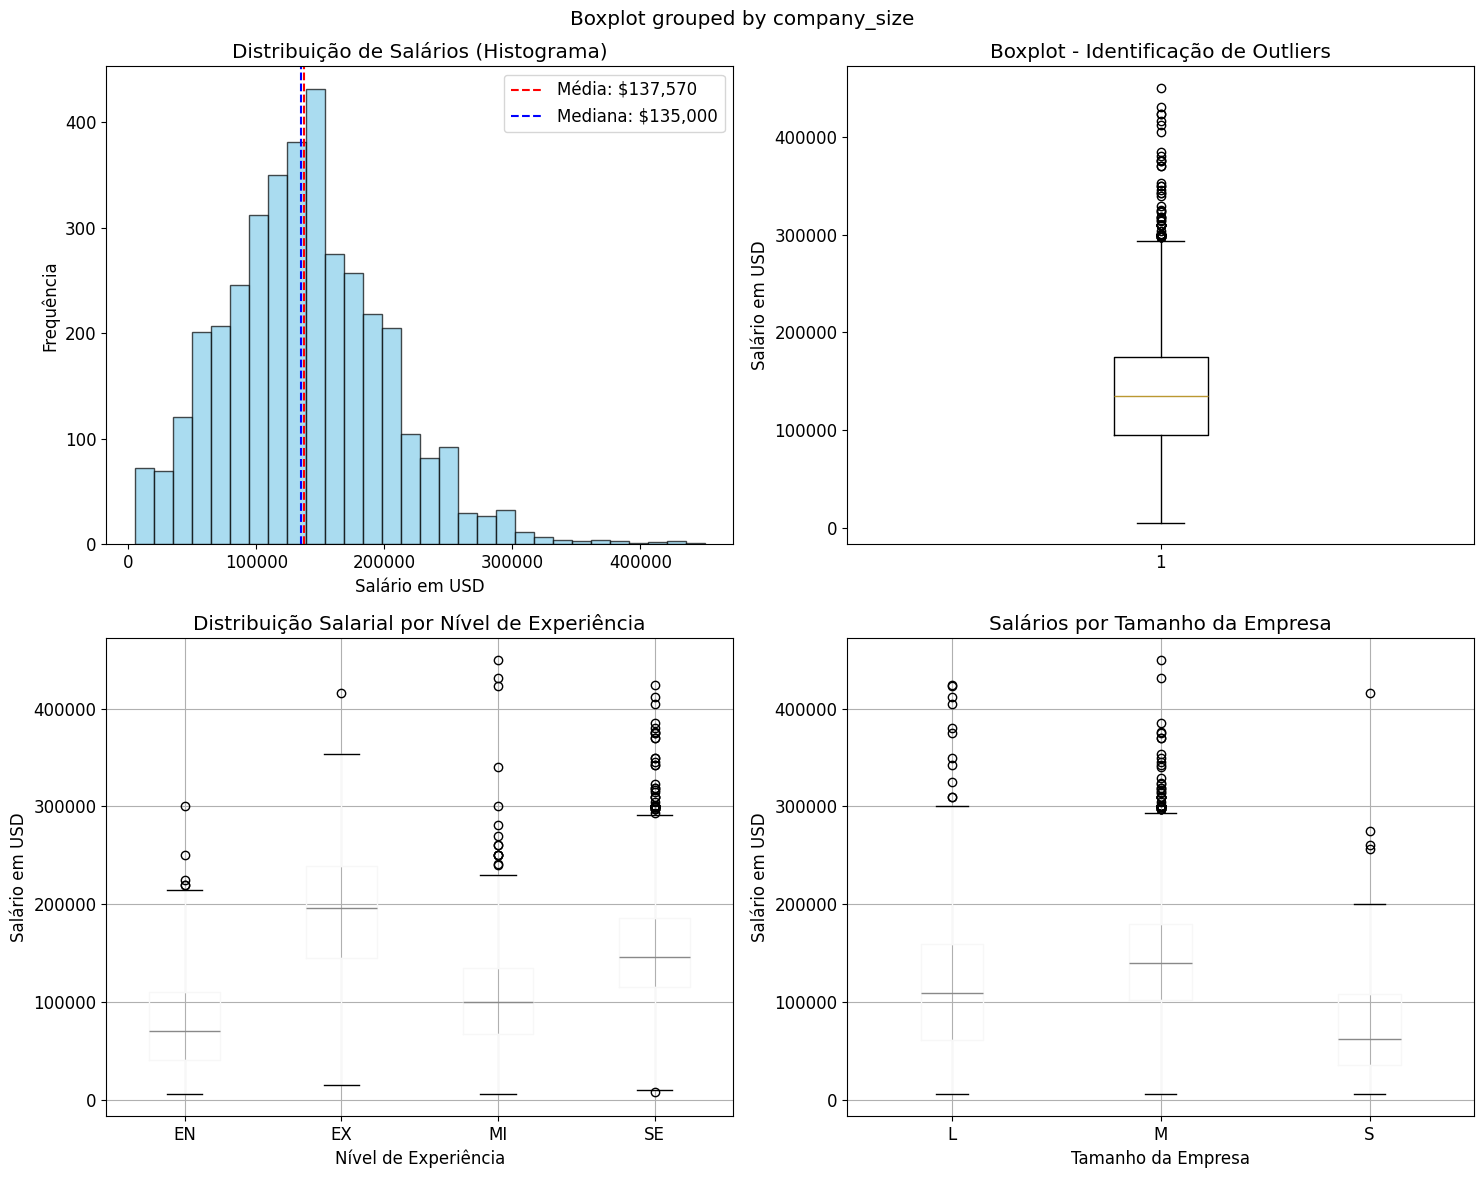


🎯 ANÁLISE DE OUTLIERS:
📊 Total de outliers detectados: 63
📈 Outliers representam: 1.7% da base
💰 Maior outlier: $450,000
💸 Menor outlier: $297,300


In [65]:
# Criação de visualizações para entender a distribuição salarial
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Análise Visual da Distribuição Salarial", fontsize=16, fontweight="bold")

# 1. Histograma da distribuição salarial
axes[0, 0].hist(df["salary_in_usd"], bins=30, color="skyblue", alpha=0.7, edgecolor="black")
axes[0, 0].set_title("Distribuição de Salários (Histograma)")
axes[0, 0].set_xlabel("Salário em USD")
axes[0, 0].set_ylabel("Frequência")
axes[0, 0].axvline(df["salary_in_usd"].mean(), color="red", linestyle="--", label=f"Média: ${df['salary_in_usd'].mean():,.0f}")
axes[0, 0].axvline(df["salary_in_usd"].median(), color="blue", linestyle="--", label=f"Mediana: ${df['salary_in_usd'].median():,.0f}")
axes[0, 0].legend()

# 2. Boxplot da distribuição salarial
axes[0, 1].boxplot(df["salary_in_usd"])
axes[0, 1].set_title("Boxplot - Identificação de Outliers")
axes[0, 1].set_ylabel("Salário em USD")

# 3. Distribuição por nível de experiência
df.boxplot(column = "salary_in_usd", by="experience_level", ax=axes[1, 0])
axes[1, 0].set_title("Distribuição Salarial por Nível de Experiência")
axes[1, 0].set_xlabel("Nível de Experiência")
axes[1, 0].set_ylabel("Salário em USD")

# 4. Distribuição por tamanho da empresa
df.boxplot(column="salary_in_usd", by="company_size", ax=axes[1, 1])
axes[1, 1].set_title("Salários por Tamanho da Empresa")
axes[1, 1].set_xlabel("Tamanho da Empresa")
axes[1, 1].set_ylabel("Salário em USD")

plt.tight_layout()
plt.show()

# Análise de outliers
Q1 = df["salary_in_usd"].quantile(0.25)
Q3 = df["salary_in_usd"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df["salary_in_usd"] < limite_inferior) | (df["salary_in_usd"] > limite_superior)]
print(f"\n🎯 ANÁLISE DE OUTLIERS:")
print("=" * 30)
print(f"📊 Total de outliers detectados: {len(outliers)}")
print(f"📈 Outliers representam: {(len(outliers)/len(df))*100:.1f}% da base")
if len(outliers) > 0:
    print(f"💰 Maior outlier: ${outliers['salary_in_usd'].max():,.0f}")
    print(f"💸 Menor outlier: ${outliers['salary_in_usd'].min():,.0f}")